# An OpenSCAD Kernel in Jupyter

I was missing a Jupyter Kernel for OpenSCAD. So I took up the challenge and here is the result.  

Any code in a regular a cell is added to the overall SCAD code. This allows you to build up a OpenSCAD model in multiple steps using Jupyter cells and document your design process along the way.

## Magic Commands

The kernel supports the following "magic" commands:
- __%lsmagic__: Lists all magic commands
- __%clear__: Clears the Scad Code in the current memory
- __%command <command>__: Defines the converter which translates the scad code to the diplay format. The default value is openscad
- __%display <scad code>__: Adds some display code which is relevant for the cell only. One line only
- __%%display <scad code>__: Adds multple lines of scad code which is relevant for the current cell only.
- __%mime <mime>__: Defines the mime code which is used to render the content
- __%include <url>__: Adds the SCAD code from a URL
- __%saveAs <fileName>__: Converts the the SCAD into a output format and saves the result in a file.
    
%lsmagic provides an overview of all supported magic commands

In [ ]:
%lsmagic 

The %clear command is resetting the internal OpenSCAD code. We recommend that you start your workspace with it so that you start from an empty state if you call 'Run All Cells'.

In [3]:
%clear

SCAD code buffer has been cleared

We use a command line command to convert the scad code to 2d or 3d output. By default this is openscad

In [4]:
%command 

The display command is 'openjscad'

If you have openjcad installed you can use this instead

In [5]:
%command openjscad

The display command is 'openjscad'

...but we want to keep openscad so we switch back to it

In [6]:
%command openscad

The display command is 'openscad'

In [7]:
%clear

SCAD code buffer has been cleared

## Display
You might want to display some SCAD code only temporarily e.g. to demonstrate some failed approaches.  This can be be achieved with thel help of the %%display command at the beginning of the section. 

All code which comes after the %%display command is only relevant for the current cell and will be discarded by the other cells.


Compiling design (CSG Products normalization)...
Normalized CSG tree has 2 elements


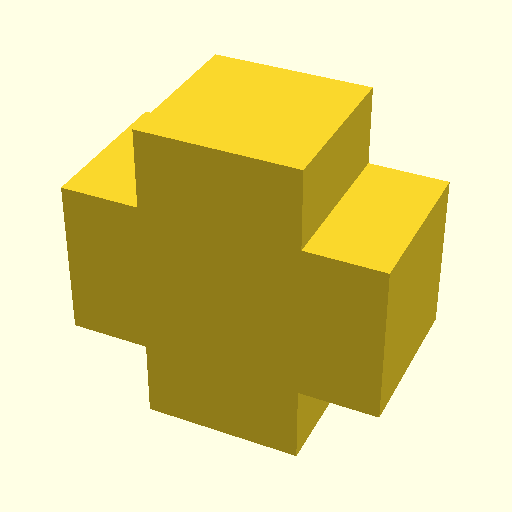

In [8]:
%%display

union() {
     cube(size = [2,1,1], center = true);
     cube(size = [1,1,2], center = true);
}     


When you just add some code - it is added to the memory which is available in all cells.

In [9]:
module test() {
    cube([1,2,3], center = true);
}


Number of lines of OpenSCAD code: 4

If you want to render the content you can do this by calling %diplay 


Compiling design (CSG Products normalization)...
Normalized CSG tree has 2 elements


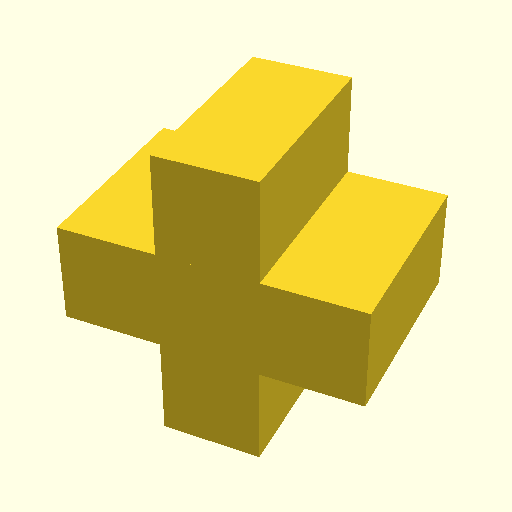

In [10]:
module test1() {
    union() {
        cube([3,2,1], center = true);
        test();
    }
}

%display test1();

## Mime
You can also define the output mime type which whill be used to render the content. The most important ones are
- text/plain
- image/png
- model/stl

The default setting is image/png

In [11]:
%mime

The display mime type is 'image/png'

If you want to display your Scad Code  which has been defined in the current buffer (and not an image or 3D model) - you can set the mime to text/plain

In [12]:
%mime text/plain


The display mime type is 'text/plain'

In [13]:
%display

module test() {
    cube([1,2,3], center = true);
}
module test1() {
    union() {
        cube([3,2,1], center = true);
        test();
    }
}

## Include
You can also include some SCAD code with the help of an URL

The display mime type is 'image/png'
Included number of lines: 111

Compiling design (CSG Products normalization)...
Normalized CSG tree has 26 elements


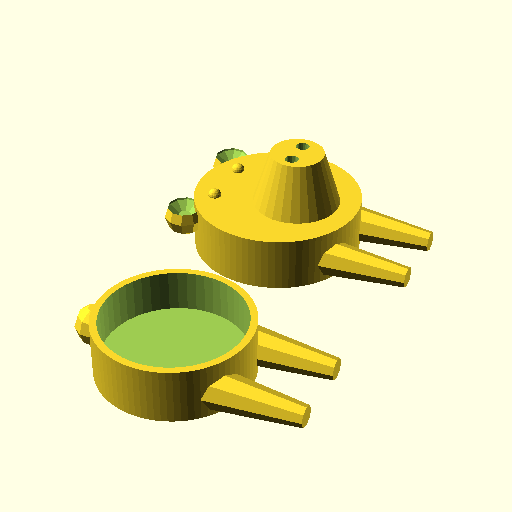

In [14]:
%mime image/png
%include https://raw.githubusercontent.com/pschatzmann/openscad-models/master/Pig.scad

%display

## SaveAs
Finally you can save your result in a file. The file extension is used to determine the file type automaticlly. [The supported file types can be found in the OpenSCAD documentation](https://en.wikibooks.org/wiki/OpenSCAD_User_Manual/STL_Export).

In [15]:
%saveAs pig.stl

File 'pig.stl' created